# Performing Dimension Reduction With PCA(Principle Components Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('/home/ataur/Downloads/Datasets_PCA_Problem Statement/wine.csv')

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
df.duplicated().sum()

0

# Outliers Process

Type                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Alcohol             AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Malic               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Ash                 AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Alcalinity            AxesSubplot(0.125,0.518913;0.168478x0.16413)
Magnesium          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Phenols            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Flavanoids         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Nonflavanoids         AxesSubplot(0.125,0.321957;0.168478x0.16413)
Proanthocyanins    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Color              AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Hue                AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Dilution                 AxesSubplot(0.125,0.125;0.168478x0.16413)
Proline               AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

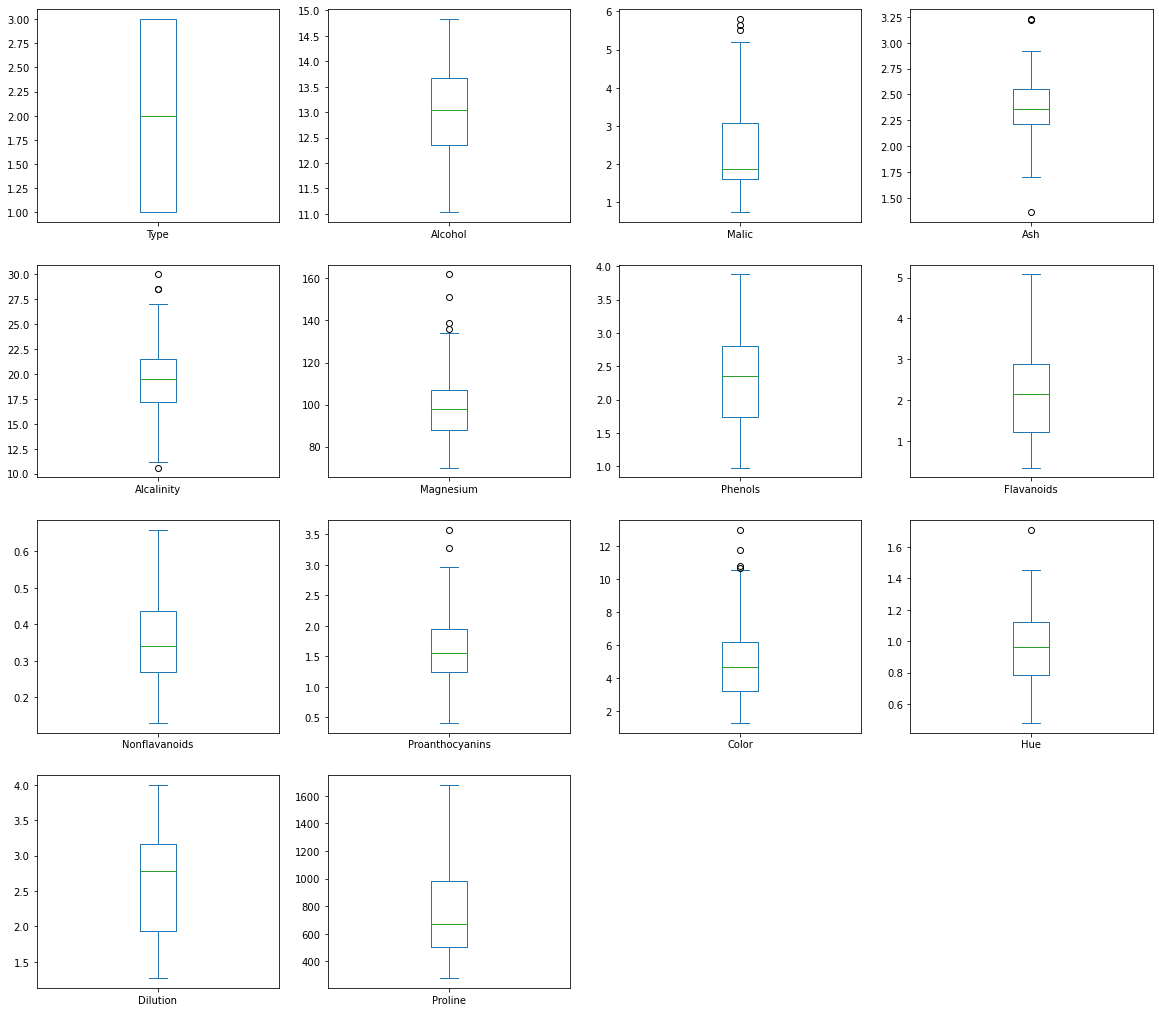

In [7]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(20,18))

In [8]:
# first Column
iqr = df['Malic'].quantile(0.75) - df['Malic'].quantile(0.25)
iqr

1.4799999999999998

In [9]:
lower_limit = df['Malic'].quantile(0.25) - 1.5*(iqr)
lower_limit

-0.6174999999999995

In [10]:
upper_limit = df['Malic'].quantile(0.75) + 1.5*(iqr)
upper_limit

5.3025

In [11]:
df['Malic'] = np.where(df['Malic'] > upper_limit, upper_limit, np.where(df['Malic'] < lower_limit, lower_limit, df['Malic']))

In [12]:
# Second Column
iqr = df['Ash'].quantile(0.75) - df['Ash'].quantile(0.25)
iqr

0.34750000000000014

In [13]:
lower_limit = df['Ash'].quantile(0.25) - 1.5*(iqr)
lower_limit

1.6887499999999998

In [14]:
upper_limit = df['Ash'].quantile(0.75) + 1.5*(iqr)
upper_limit

3.0787500000000003

In [15]:
df['Ash'] = np.where(df['Ash'] > upper_limit, upper_limit, np.where(df['Ash'] < lower_limit, lower_limit, df['Ash']))

In [16]:
# Third column
iqr = df['Alcalinity'].quantile(0.75) - df['Alcalinity'].quantile(0.25)
iqr

4.300000000000001

In [17]:
lower_limit = df['Alcalinity'].quantile(0.25) - 1.5*(iqr)
lower_limit

10.749999999999998

In [18]:
upper_limit = df['Alcalinity'].quantile(0.75) + 1.5*(iqr)
upper_limit

27.950000000000003

In [19]:
df['Alcalinity'] = np.where(df['Alcalinity'] > upper_limit, upper_limit, np.where(df['Alcalinity'] < lower_limit, lower_limit, df['Alcalinity']))

In [20]:
# Forth column
iqr = df['Magnesium'].quantile(0.75) - df['Magnesium'].quantile(0.25)
iqr

19.0

In [21]:
lower_limit = df['Magnesium'].quantile(0.25) - 1.5*(iqr)
lower_limit

59.5

In [22]:
upper_limit = df['Magnesium'].quantile(0.75) + 1.5*(iqr)
upper_limit

135.5

In [23]:
df['Magnesium'] = np.where(df['Magnesium'] > upper_limit, upper_limit, np.where(df['Magnesium'] < lower_limit, lower_limit, df['Magnesium']))

In [24]:
# Fifth column
iqr = df['Proanthocyanins'].quantile(0.75) - df['Proanthocyanins'].quantile(0.25)
iqr

0.7

In [25]:
lower_limit = df['Proanthocyanins'].quantile(0.25) - 1.5*(iqr)
lower_limit

0.20000000000000018

In [26]:
upper_limit = df['Proanthocyanins'].quantile(0.75) + 1.5*(iqr)
upper_limit

3.0

In [27]:
df['Proanthocyanins'] = np.where(df['Proanthocyanins'] > upper_limit, upper_limit, np.where(df['Proanthocyanins'] < lower_limit, lower_limit, df['Proanthocyanins']))

In [28]:
# Sixth column
iqr = df['Color'].quantile(0.75) - df['Color'].quantile(0.25)
iqr

2.9800000000000004

In [29]:
lower_limit = df['Color'].quantile(0.25) - 1.5*(iqr)
lower_limit

-1.2500000000000009

In [30]:
upper_limit = df['Color'].quantile(0.75) + 1.5*(iqr)
upper_limit

10.670000000000002

In [31]:
df['Color'] = np.where(df['Color'] > upper_limit, upper_limit, np.where(df['Color'] < lower_limit, lower_limit, df['Color']))

In [32]:
# Seven column
iqr = df['Hue'].quantile(0.75) - df['Hue'].quantile(0.25)
iqr

0.33750000000000013

In [33]:
lower_limit = df['Hue'].quantile(0.25) - 1.5*(iqr)
lower_limit

0.2762499999999998

In [34]:
upper_limit = df['Hue'].quantile(0.75) + 1.5*(iqr)
upper_limit

1.6262500000000002

In [35]:
df['Hue'] = np.where(df['Hue'] > upper_limit, upper_limit, np.where(df['Hue'] < lower_limit, lower_limit, df['Hue']))

Type                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Alcohol             AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Malic               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Ash                 AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Alcalinity            AxesSubplot(0.125,0.518913;0.168478x0.16413)
Magnesium          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Phenols            AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Flavanoids         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Nonflavanoids         AxesSubplot(0.125,0.321957;0.168478x0.16413)
Proanthocyanins    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Color              AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Hue                AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Dilution                 AxesSubplot(0.125,0.125;0.168478x0.16413)
Proline               AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

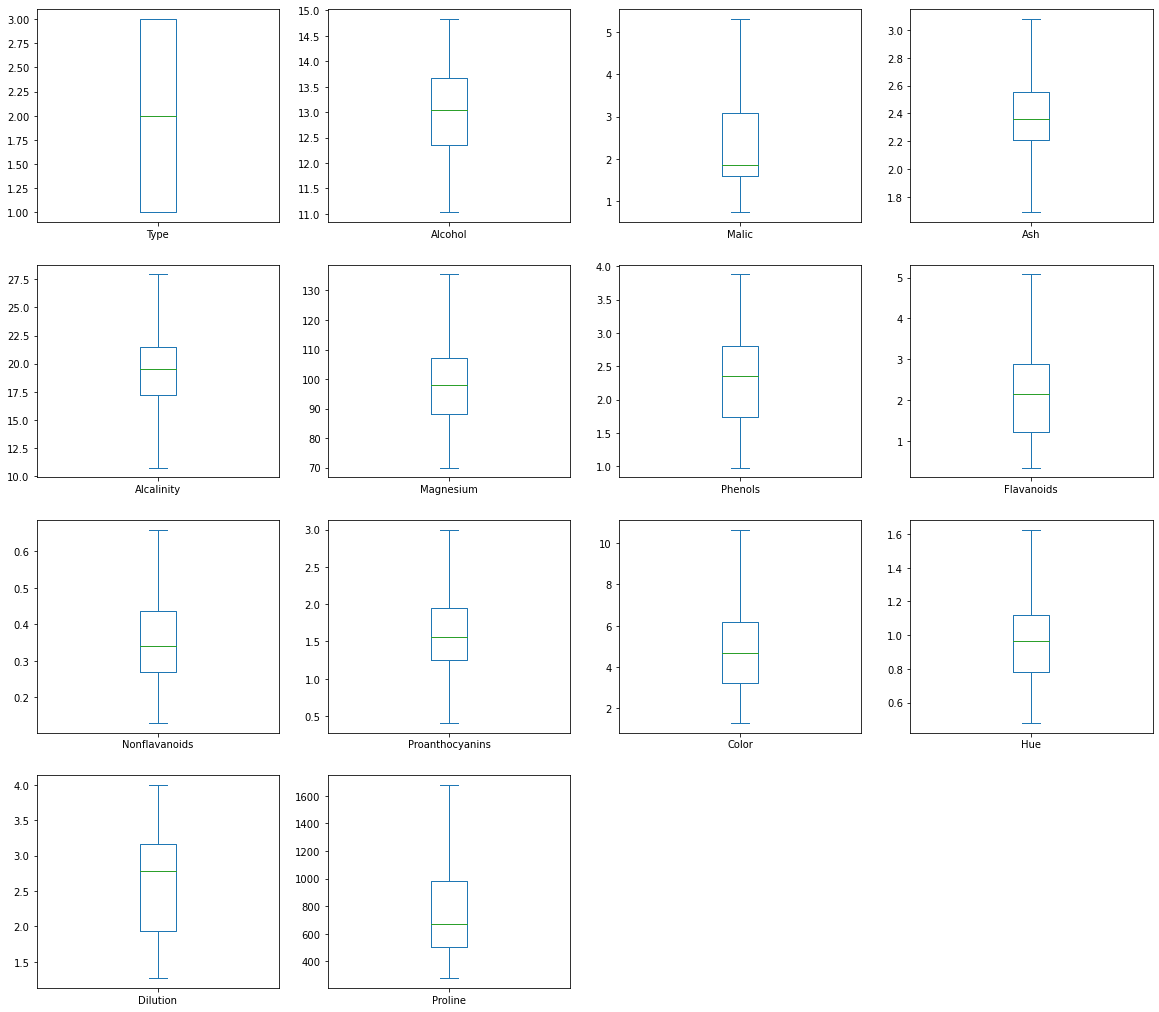

In [36]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(20,18))

# Normalization

In [37]:
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)

In [38]:
df_norm = norm_func(df.iloc[:,1:])

In [39]:
df_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.212603,0.533273,0.281977,0.870229,0.627586,0.573840,0.283019,0.725869,0.464324,0.488550,0.970696,0.561341
1,0.571053,0.227945,0.324640,0.026163,0.458015,0.575862,0.510549,0.245283,0.335907,0.330138,0.497274,0.780220,0.550642
2,0.560526,0.355068,0.705935,0.456395,0.473282,0.627586,0.611814,0.320755,0.926641,0.468584,0.479826,0.695971,0.646933
3,0.878947,0.265205,0.583633,0.351744,0.656489,0.989655,0.664557,0.207547,0.683398,0.694356,0.331516,0.798535,0.857347
4,0.581579,0.405479,0.849820,0.595930,0.732824,0.627586,0.495781,0.490566,0.544402,0.323749,0.488550,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,1.000000,0.547662,0.566860,0.381679,0.241379,0.056962,0.735849,0.250965,0.683706,0.139586,0.172161,0.329529
174,0.623684,0.694795,0.569245,0.712209,0.488550,0.282759,0.086498,0.566038,0.386100,0.641108,0.191930,0.106227,0.336662
175,0.589474,0.775890,0.410971,0.537791,0.763359,0.210345,0.073840,0.566038,0.362934,0.949947,0.095965,0.106227,0.397290
176,0.563158,0.405479,0.490108,0.537791,0.763359,0.231034,0.071730,0.754717,0.405405,0.854100,0.104689,0.128205,0.400856


In [40]:
pca = PCA(n_components=13)

In [41]:
pca_v = pca.fit_transform(df_norm)

In [42]:
pca_v

array([[-0.74237809, -0.3341633 ,  0.02073392, ...,  0.01508793,
        -0.09232318, -0.01451748],
       [-0.48884803,  0.02259572, -0.3705329 , ...,  0.00146734,
        -0.09710243,  0.00330144],
       [-0.54760715, -0.24435907,  0.23645814, ..., -0.0553851 ,
        -0.08752844,  0.005045  ],
       ...,
       [ 0.6606089 , -0.64682223, -0.10381135, ...,  0.1992812 ,
        -0.00784973,  0.00202534],
       [ 0.57814144, -0.51418186, -0.1084128 , ...,  0.07330747,
         0.01248004, -0.01219863],
       [ 0.76040559, -0.57039342,  0.28073434, ..., -0.03022826,
         0.00885787, -0.07082755]])

# Pca Weights

In [43]:
pca.components_

array([[-1.18091114e-01,  2.74415847e-01,  7.40307507e-03,
         1.96772575e-01, -1.15212841e-01, -3.77175811e-01,
        -3.98130002e-01,  3.18270927e-01, -3.02103788e-01,
         1.19736810e-01, -2.67009727e-01, -4.55227213e-01,
        -2.69271415e-01],
       [-4.76549491e-01, -2.18500375e-01, -2.28843679e-01,
         5.92760485e-02, -2.87837691e-01, -8.66338531e-02,
        -2.32960518e-02,  7.11639433e-03, -5.84302386e-02,
        -5.82398139e-01,  2.21298091e-01,  1.73650285e-01,
        -3.95723170e-01],
       [-1.39603985e-01,  3.40630734e-01,  5.56014575e-01,
         5.38432724e-01,  9.96953496e-02,  1.88781623e-01,
         1.61223380e-01,  2.38596698e-01,  2.08333199e-01,
        -1.21874291e-01, -1.76340137e-02,  2.46252446e-01,
        -1.33090602e-01],
       [ 1.77859685e-02,  6.51591889e-01, -3.32226358e-01,
        -1.06607882e-01, -1.99647269e-01,  5.68924239e-02,
         4.89992533e-02, -4.15945041e-01,  2.07908136e-01,
        -1.74222127e-02, -3.43505055e

In [44]:
pca.components_[0]

array([-0.11809111,  0.27441585,  0.00740308,  0.19677258, -0.11521284,
       -0.37717581, -0.39813   ,  0.31827093, -0.30210379,  0.11973681,
       -0.26700973, -0.45522721, -0.26927141])

In [45]:
var = pca.explained_variance_ratio_

In [46]:
var

array([0.37752763, 0.20073531, 0.0911699 , 0.07275951, 0.06155731,
       0.05159613, 0.03968108, 0.0255    , 0.02181212, 0.02026372,
       0.0154215 , 0.01439521, 0.00758059])

# Cumulative Variance

In [47]:
var1 = np.cumsum(np.round(var, decimals=4)*100)

In [48]:
var1

array([ 37.75,  57.82,  66.94,  74.22,  80.38,  85.54,  89.51,  92.06,
        94.24,  96.27,  97.81,  99.25, 100.01])

# variance plot for pca components obtain

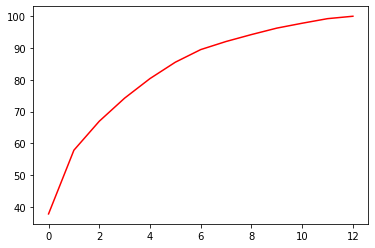

In [49]:
plt.plot(var1, color='red')

# Transforming pca_values into new data frame

In [50]:
data = pd.DataFrame(pca_v)

In [51]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.742378,-0.334163,0.020734,0.000091,0.104069,-0.080453,0.146934,0.073317,0.283081,-0.147618,0.015088,-0.092323,-0.014517
1,-0.488848,0.022596,-0.370533,0.079290,-0.063275,-0.241465,0.003607,0.193375,-0.069821,-0.098851,0.001467,-0.097102,0.003301
2,-0.547607,-0.244359,0.236458,0.054619,-0.084025,0.146042,0.091632,-0.178455,-0.150749,-0.112471,-0.055385,-0.087528,0.005045
3,-0.809298,-0.656370,0.026831,0.060497,-0.077991,0.042566,-0.082563,0.143534,-0.053878,-0.075791,-0.005911,0.148442,-0.076966
4,-0.215145,-0.140491,0.412441,-0.135035,0.125411,-0.089670,0.078410,0.076538,0.047854,0.075597,-0.098150,-0.059302,-0.015295
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.786732,-0.462235,0.087226,0.254633,-0.185657,-0.207433,0.089753,-0.015801,-0.021389,0.028615,0.041426,-0.007217,-0.028835
174,0.615840,-0.375012,0.082860,0.082095,0.043235,0.015413,0.032731,-0.117485,-0.026697,0.042003,0.002265,0.078341,-0.041055
175,0.660609,-0.646822,-0.103811,0.156580,0.176214,0.068102,0.206661,0.055473,-0.006434,-0.044779,0.199281,-0.007850,0.002025
176,0.578141,-0.514182,-0.108413,-0.178122,0.106227,0.189895,0.209634,0.103679,0.068205,-0.150573,0.073307,0.012480,-0.012199


In [52]:
data.columns = 'comp0', 'comp1', 'comp2', 'comp3', 'comp4', 'comp5', 'comp6', 'comp7', 'comp8', 'comp9', 'comp10', 'comp11', 'comp12'

In [55]:
Wine_d = pd.concat([df.Type, data.iloc[:, 10:]], axis=1)

In [56]:
Wine_d

,Type,comp10,comp11,comp12
0,1,0.015088,-0.092323,-0.014517
1,1,0.001467,-0.097102,0.003301
2,1,-0.055385,-0.087528,0.005045
3,1,-0.005911,0.148442,-0.076966
4,1,-0.098150,-0.059302,-0.015295
...,...,...,...,...
173,3,0.041426,-0.007217,-0.028835
174,3,0.002265,0.078341,-0.041055
175,3,0.199281,-0.007850,0.002025
176,3,0.073307,0.012480,-0.012199


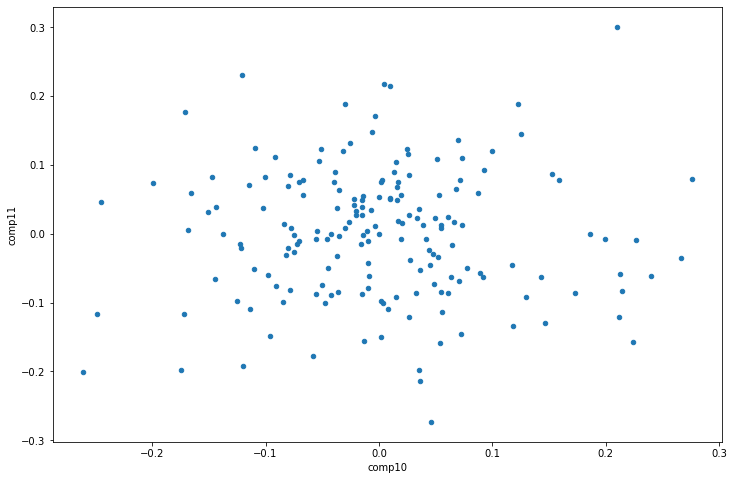

In [57]:
Wine_d.plot(x='comp10', y='comp11', kind='scatter',figsize=(12,8))

In [58]:
Wine_d.to_csv('New_wine.csv')

In [59]:
import os 

In [60]:
os.getcwd()

'/home/ataur'